<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/Project_GiveMeSomeCredit_ByEkta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Ekta Kashyap, Central Bank of India  
Kaggle [URL](https://www.kaggle.com/c/GiveMeSomeCredit/overview)  
Date: 20th May, 2021  
Published by: Ashok K Harnal


## <font color='blue'>**Project Objective:**</font></br>
##### To improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years.

### <font color='green'>**Context:**</font></br>
##### Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. </br>

##### Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This project requires to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The aim of this project is to build a model that borrowers can use to help make the best financial decisions.

Historical data are provided on 250,000 borrowers

####<font color='blue'>**Calling Data Manupulation, Plotting, OS & Warning Libraries:**</font>


In [36]:
# For data manupulation
import pandas as pd
import numpy as np
from tabulate import tabulate
from scipy.stats import norm 

# For visual interpretation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

# Call os for setting up navigation and environment
import os

In [37]:
# Import warnings module
import warnings
# Do not print warnings on screen
warnings.filterwarnings("ignore")

In [38]:
# For displaying all outputs from a cell--not just the last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### <font color='blue'>**Importing Data To Colab Machine**</font>

##### <font color='green'>**(1)** </font>Establish a connection to Google Drive. Login to the Google account when prompted and copy a validation token each time we connect to Drive from Colab. After establishing the connection, we will see a new folder appear in the side bar as ‘/gdrive’. </br>

##### <font color='green'>**(2)** </font>Copy the compressed file from '/gdrive' to the virtual machine and unzip it to access the data. Do not remove the original zip from your Drive after copying. We will need to copy it at the start of each session while working with Colab. </br>

##### <font color='green'>**(2)** </font> Unzip the data




In [39]:
# Mount google drive
from google.colab import drive
drive.mount('/ashok')

Drive already mounted at /ashok; to attempt to forcibly remount, call drive.mount("/ashok", force_remount=True).


In [40]:
# Complete path to storage location of the .zip file of data
zip_path = '/ashok/MyDrive/Colab_data_files/GiveMeSomeCredit'

In [41]:
# Check current directory (be sure you're in the directory where Colab operates: '/content')
os.getcwd()
os.chdir(zip_path)

'/ashok/My Drive/Colab_data_files/GiveMeSomeCredit'

### **<font color='blue'>Reading Data</font>**

In [42]:
df_train = pd.read_csv('cs-training.csv.zip')
df_test = pd.read_csv('cs-test.csv.zip')
df_sample = pd.read_csv('sampleEntry.csv.zip')
df_DataDictionary = pd.read_excel('Data Dictionary.xls', header=0, index_col=0)

##### <font color='green'>**Dataset Contain Following Features:**</font>

In [43]:
#df_DataDictionary.style.set_properties(**{'text-align': 'left'})
print(tabulate(df_DataDictionary, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════╕
│ Variable Name                        │ Description                                                                                                                                              │ Type       │
╞══════════════════════════════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪════════════╡
│ SeriousDlqin2yrs                     │ Person experienced 90 days past due delinquency or worse                                                                                                 │ Y/N        │
├──────────────────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

#### <font color='blue'>**Exploring Dataset:**</font>

In [44]:
print(df_train.shape)
print(df_test.shape)

(150000, 12)
(101503, 12)


In [45]:
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [47]:
df_train.describe().round(2)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,75000.50,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,43301.41,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,37500.75,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,75000.50,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,112500.25,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,150000.00,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


In [48]:
df_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [50]:
df_test.describe().round(2)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.00,0.0,101503.00,101503.00,101503.00,101503.00,81400.00,101503.00,101503.00,101503.00,101503.00,98877.00
mean,50752.00,NaN,5.31,52.41,0.45,344.48,6855.04,8.45,0.30,1.01,0.27,0.77
std,29301.54,NaN,196.16,14.78,4.54,1632.60,36508.60,5.14,4.52,1.11,4.50,1.14
min,1.00,NaN,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,25376.50,NaN,0.03,41.00,0.00,0.17,3408.00,5.00,0.00,0.00,0.00,0.00
50%,50752.00,NaN,0.15,52.00,0.00,0.36,5400.00,8.00,0.00,1.00,0.00,0.00
75%,76127.50,NaN,0.56,63.00,0.00,0.85,8200.00,11.00,0.00,2.00,0.00,1.00
max,101503.00,NaN,21821.00,104.00,98.00,268326.00,7727000.00,85.00,98.00,37.00,98.00,43.00


###### <font color='dark orange'>*Values are missing from both Test & Train Datasets*</font>

#### <font color='blue'>**Visual Analysis Of the Missing Values:**</font>

<Figure size 576x360 with 0 Axes>

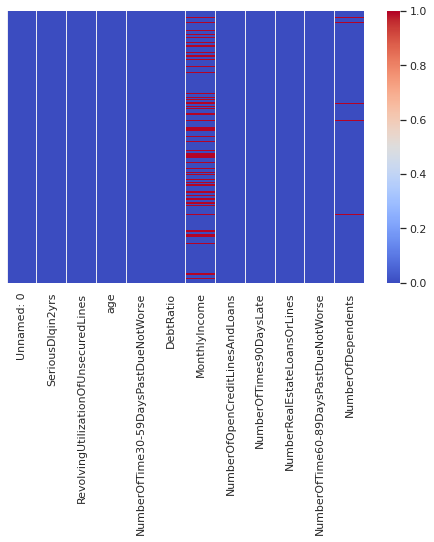

In [51]:
# Heatmap for missing values in training data
plt.figure(figsize=(8,5))
sns.heatmap(df_train.isnull(), cmap="coolwarm", yticklabels=False, cbar=True)
plt.show()

###### <font color='dark orange'>_There are missing values in **MonthlyIncome** and **NumberOfDependents**_</font>
 

In [52]:
# Percentage of data missing
round(df_train.isnull().mean() * 100,2)

Unnamed: 0                               0.00
SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.82
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.62
dtype: float64

###### <font color='dark orange'>_**MonthlyIncome** has 19.8% missing values and **NumberOfDependents** has 2.6% missing values_</font>


<Figure size 576x360 with 0 Axes>

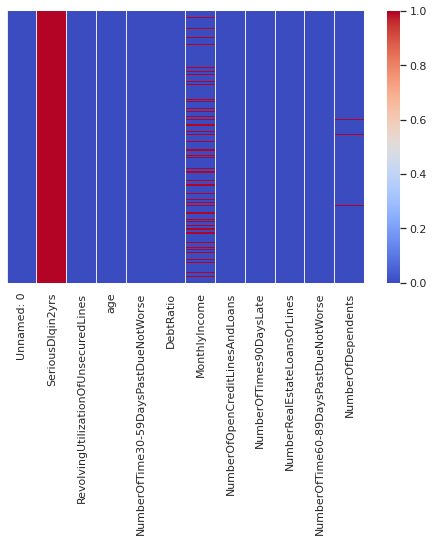

In [53]:
# Heatmap for missing values in test data
plt.figure(figsize=(8,5))
sns.heatmap(df_test.isnull(), cmap="coolwarm", yticklabels=False, cbar=True)
plt.show()

###### <font color='dark orange'>*There are missing values in __SeriousDlqin2yrs__, __MonthlyIncome__ and __NumberOfDependents__*</font>

In [54]:
round(df_test.isnull().mean() * 100,2)

Unnamed: 0                                0.00
SeriousDlqin2yrs                        100.00
RevolvingUtilizationOfUnsecuredLines      0.00
age                                       0.00
NumberOfTime30-59DaysPastDueNotWorse      0.00
DebtRatio                                 0.00
MonthlyIncome                            19.81
NumberOfOpenCreditLinesAndLoans           0.00
NumberOfTimes90DaysLate                   0.00
NumberRealEstateLoansOrLines              0.00
NumberOfTime60-89DaysPastDueNotWorse      0.00
NumberOfDependents                        2.59
dtype: float64

###### <font color='dark orange'>_**SeriousDlqin2yrs** has 100%, **MonthlyIncome** has 19.8% and **NumberOfDependents** has 2.59% missing values_</font>

#### <font color='blue'>**Fixing Missing Values in the training dataset:**</font>

In [55]:
# We will impute the MonthlyIncome with mean
df_train['MonthlyIncome'].fillna(df_train['MonthlyIncome'].mean(),inplace=True)


In [56]:
# We will impute the NumberOfDependents with mode
df_train['NumberOfDependents'].fillna(df_train['NumberOfDependents'].mode()[0], inplace=True)

#### <font color='blue'>**Fixing Missing Values in the test dataset:**</font>

In [57]:
# We will impute the MonthlyIncome with mean
df_test['MonthlyIncome'].fillna(df_test['MonthlyIncome'].mean(),inplace=True)

In [58]:
# We will impute the NumberOfDependents with mode
df_test['NumberOfDependents'].fillna(df_test['NumberOfDependents'].mode()[0], inplace=True)

#### <font color='blue'>**Checking if imputations are propoer:**</font>

In [59]:
df_train.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [60]:
df_test.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

###### <font color='dark orange'>_Imputations look good_</font>

#### <font color='blue'>**Visualisation of the data prepared:**</font>

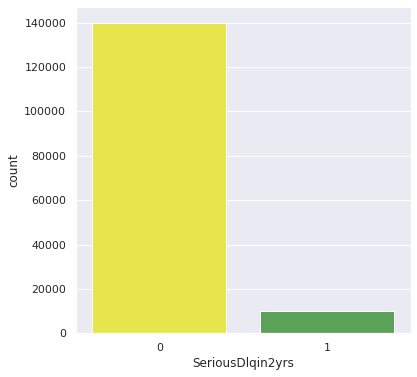

In [61]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(6,6))
sns.countplot(x='SeriousDlqin2yrs',data=df_train, palette="Set1_r")
plt.show()

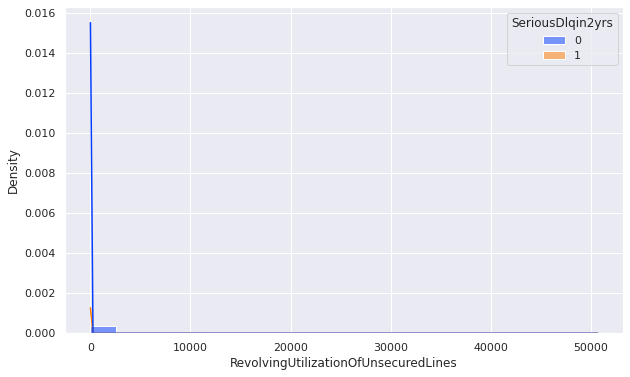

In [62]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.histplot(x='RevolvingUtilizationOfUnsecuredLines',data=df_train, stat="density", bins=20, kde=True, hue='SeriousDlqin2yrs')
plt.show()

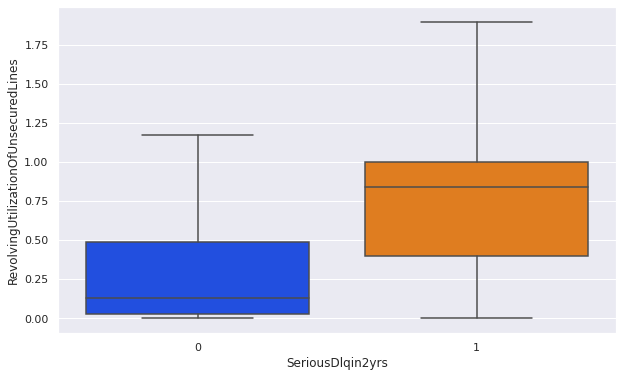

In [63]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.boxplot(x = 'SeriousDlqin2yrs', y = 'RevolvingUtilizationOfUnsecuredLines', data = df_train, showfliers=False) 
# removed the outliers as they were making the box plot very small to read)

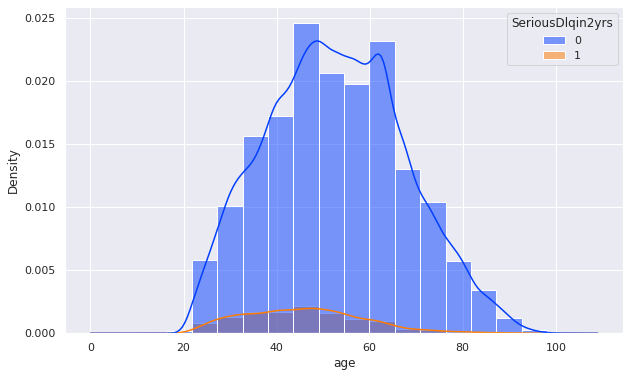

In [64]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.histplot(x='age',data=df_train, stat="density", bins=20, kde=True, hue='SeriousDlqin2yrs')
plt.show()

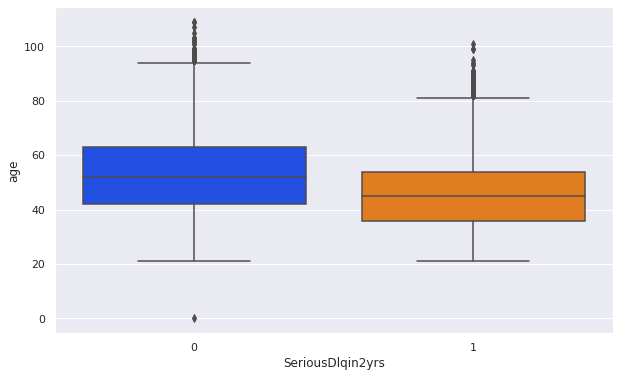

In [65]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.boxplot(x = 'SeriousDlqin2yrs', y = 'age', data = df_train)

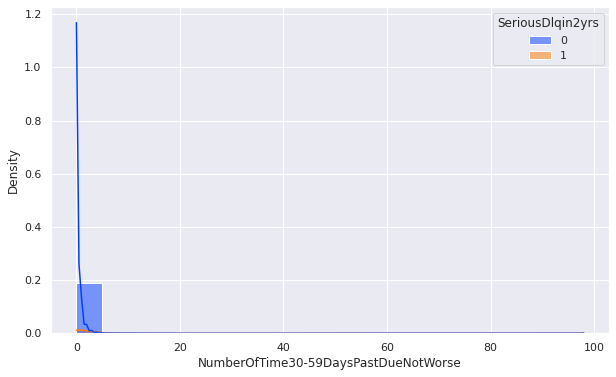

In [66]:

sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.histplot(x='NumberOfTime30-59DaysPastDueNotWorse',data=df_train, stat="density", bins=20, kde=True, hue='SeriousDlqin2yrs')
plt.show()

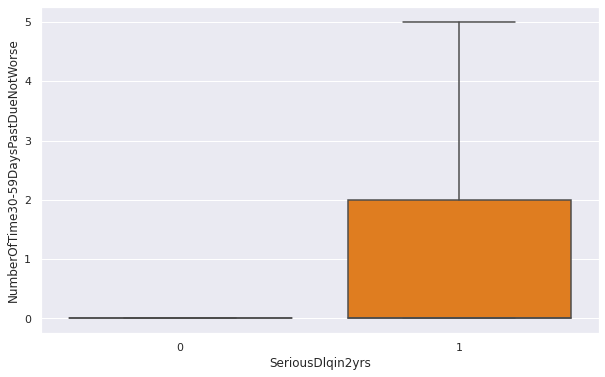

In [67]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.boxplot(x = 'SeriousDlqin2yrs', y = 'NumberOfTime30-59DaysPastDueNotWorse', data = df_train, showfliers=False) 
# removed the outliers as they were making the box plot very small to read

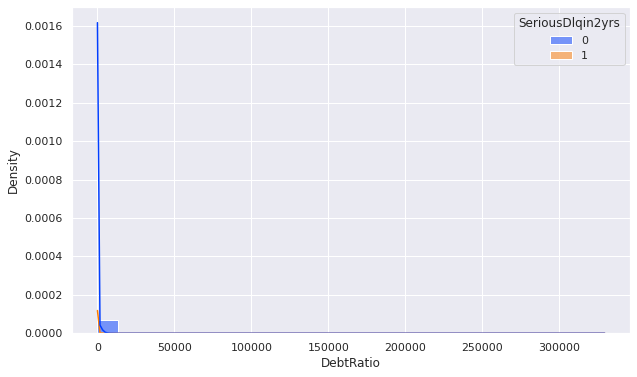

In [68]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.histplot(x='DebtRatio',data=df_train, stat="density", bins=25, kde=True, hue='SeriousDlqin2yrs')
plt.show()

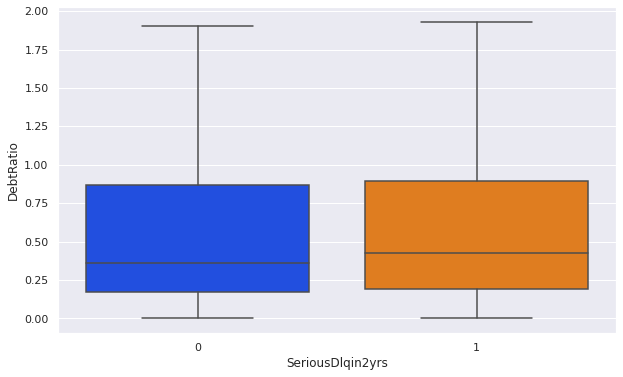

In [69]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.boxplot(x = 'SeriousDlqin2yrs', y = 'DebtRatio', data = df_train, showfliers=False) 
# removed the outliers as they were making the box plot very small to read

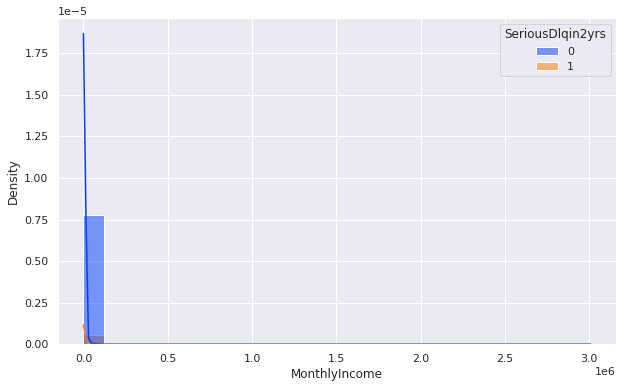

In [70]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.histplot(x='MonthlyIncome',data=df_train, stat="density", bins=25, kde=True, hue='SeriousDlqin2yrs')
plt.show()

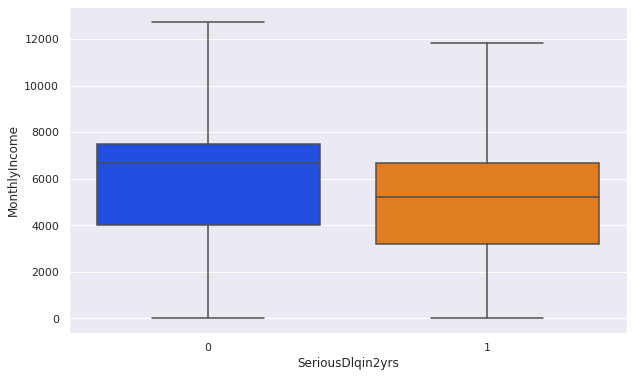

In [71]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.boxplot(x = 'SeriousDlqin2yrs', y = 'MonthlyIncome', data = df_train, showfliers=False) 
# removed the outliers as they were making the box plot very small to read

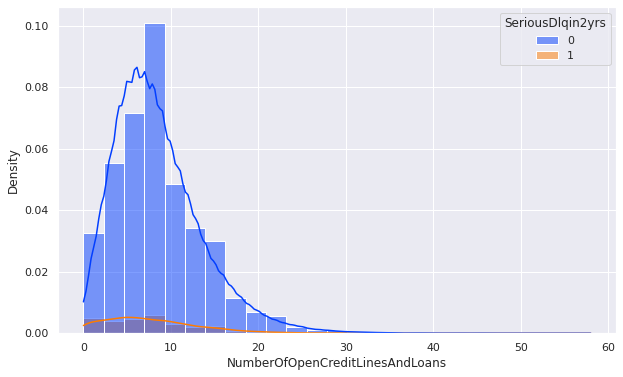

In [72]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.histplot(x='NumberOfOpenCreditLinesAndLoans',data=df_train, stat="density", bins=25, kde=True, hue='SeriousDlqin2yrs')
plt.show()

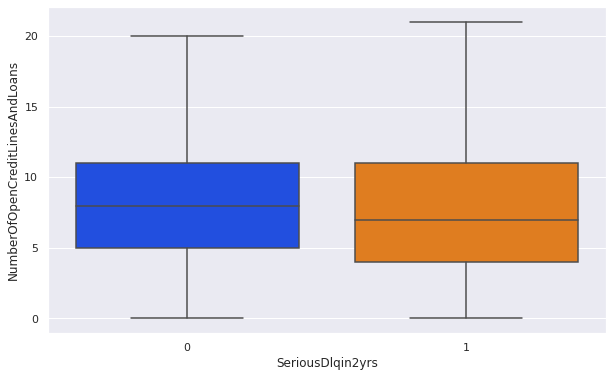

In [73]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.boxplot(x = 'SeriousDlqin2yrs', y = 'NumberOfOpenCreditLinesAndLoans', data = df_train, showfliers=False) 
# removed the outliers as they were making the box plot very small to read

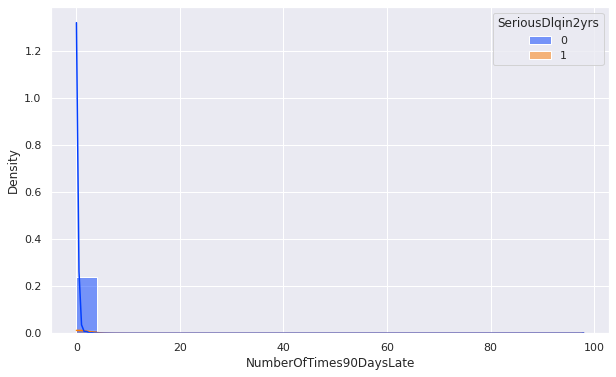

In [74]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.histplot(x='NumberOfTimes90DaysLate',data=df_train, stat="density", bins=25, kde=True, hue='SeriousDlqin2yrs')
plt.show()

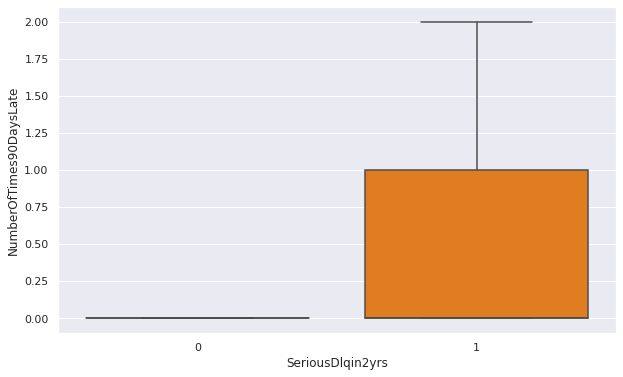

In [75]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.boxplot(x = 'SeriousDlqin2yrs', y = 'NumberOfTimes90DaysLate', data = df_train, showfliers=False) 
# removed the outliers as they were making the box plot very small to read

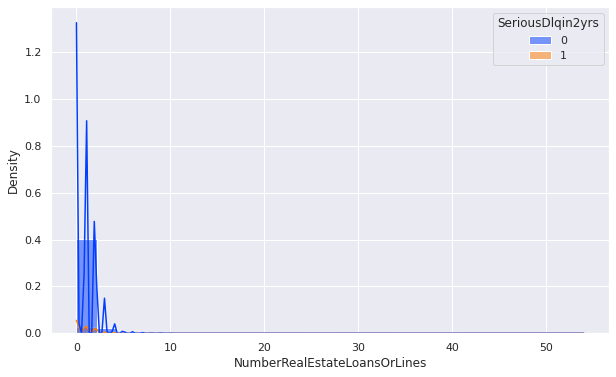

In [76]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.histplot(x='NumberRealEstateLoansOrLines',data=df_train, stat="density", bins=25, kde=True, hue='SeriousDlqin2yrs')
plt.show()

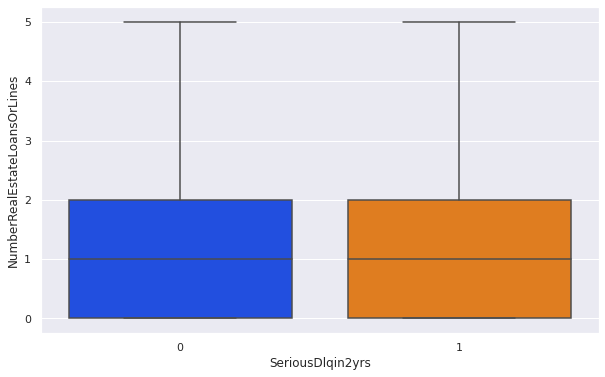

In [77]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.boxplot(x = 'SeriousDlqin2yrs', y = 'NumberRealEstateLoansOrLines', data = df_train, showfliers=False) 
# removed the outliers as they were making the box plot very small to read

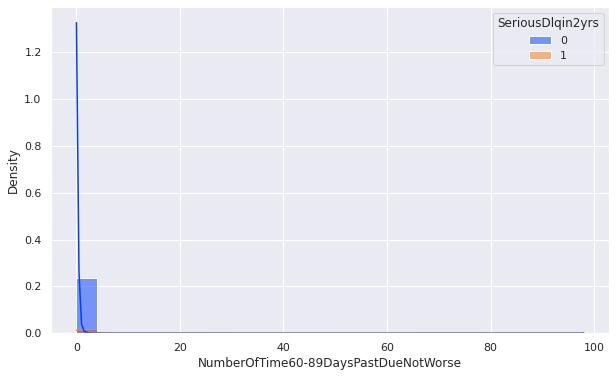

In [78]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.histplot(x='NumberOfTime60-89DaysPastDueNotWorse',data=df_train, stat="density", bins=25, kde=True, hue='SeriousDlqin2yrs')
plt.show()

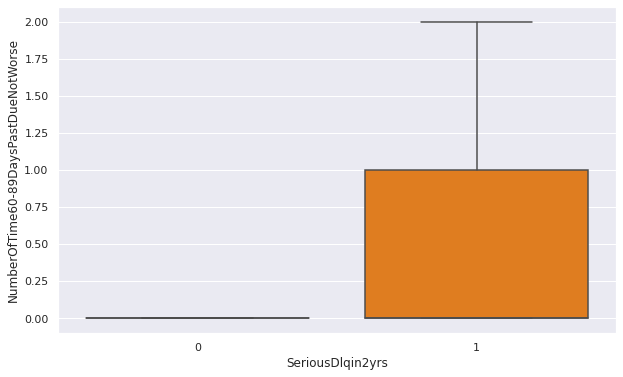

In [79]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.boxplot(x = 'SeriousDlqin2yrs', y = 'NumberOfTime60-89DaysPastDueNotWorse', data = df_train, showfliers=False) 
# removed the outliers as they were making the box plot very small to read

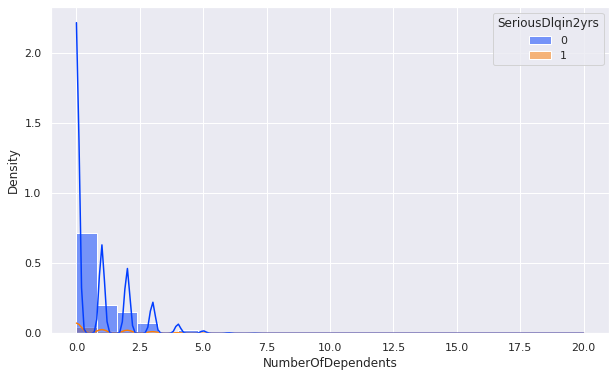

In [80]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.histplot(x='NumberOfDependents',data=df_train, stat="density", bins=25, kde=True, hue='SeriousDlqin2yrs')
plt.show()

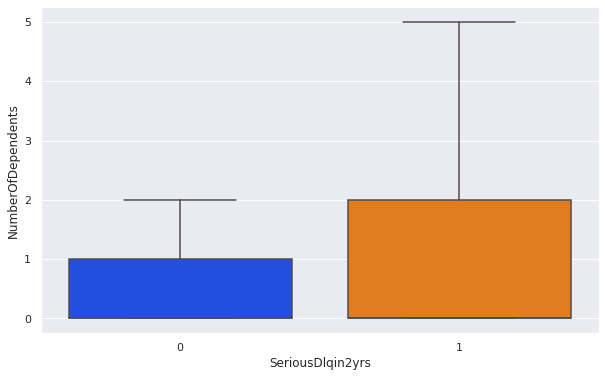

In [81]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.boxplot(x = 'SeriousDlqin2yrs', y = 'NumberOfDependents', data = df_train, showfliers=False) 
# removed the outliers as they were making the box plot very small to read

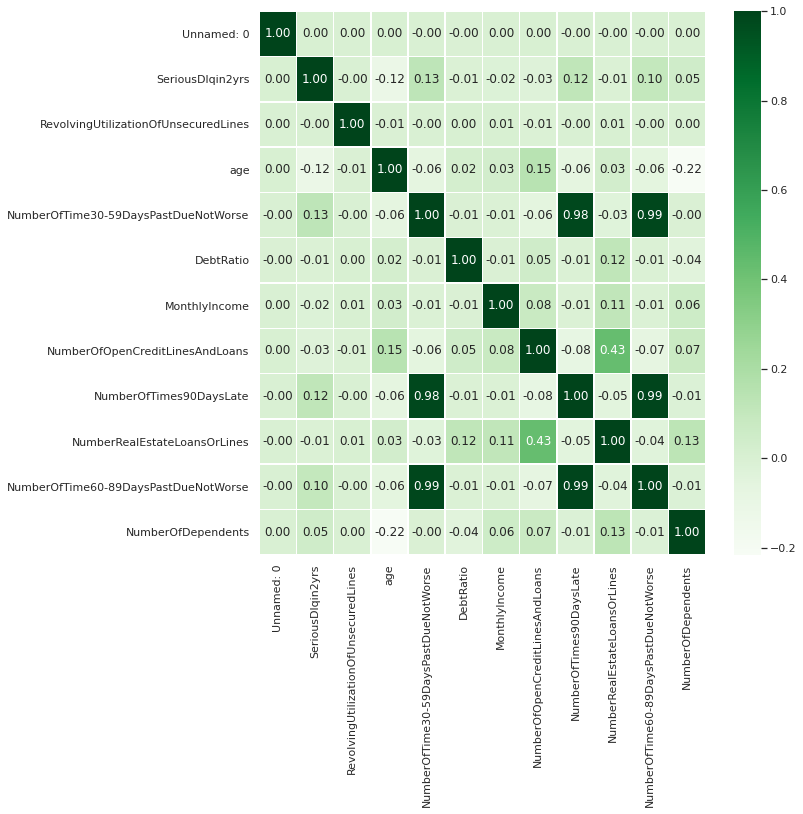

In [82]:
# Correlation
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_train.corr(), annot=True, cmap='Greens', linewidths=.5, fmt='.2f',ax=ax)
plt.show()

#### <font color='blue'>**Data Preparation For Modeling**</font>

In [83]:
# Dropping unnamed colum from test dataframe
df_train.drop('Unnamed: 0', axis=1, inplace=True)

In [84]:
# Dropping unnamed colum from test dataframe
df_test.drop('Unnamed: 0', axis=1, inplace=True)

In [85]:
X = df_train.drop('SeriousDlqin2yrs',axis=1)
y = df_train['SeriousDlqin2yrs']

##### <font color='green'>**Splitting Data**</font>

In [86]:
from sklearn.model_selection import train_test_split
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1000)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120000, 10)
(30000, 10)
(120000,)
(30000,)


#### <font color='blue'>**Model 1: Using Random Forest**</font>

##### <font color='green'>**Calling Data Modeling Libraries**</font>

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [88]:
RFC = RandomForestClassifier()

In [89]:
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 100, 150],
           "max_depth" : [2,3,5,7,9],
           "min_samples_leaf" : [2, 3]}

In [90]:
RFC_random = RandomizedSearchCV(RFC, param_distributions=param_grid, cv=5)

In [91]:
RFC_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [92]:
best_est_RFC = RFC_random.best_estimator_

In [93]:
print('Training Set Classifier Accuracy %: {:0.2f}'.format(RFC_random.score(X_train, y_train) * 100))
print('Test Set Classifier Accuracy %: {:0.2f}'.format(RFC_random.score(X_test, y_test) * 100))

Training Set Classifier Accuracy %: 94.35
Test Set Classifier Accuracy %: 93.52


In [101]:
y_pred_RFC = best_est_RFC.predict_proba(X_test)
y_pred_RFC = y_pred_RFC[:,1]

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Receiver Operating Characteristic')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

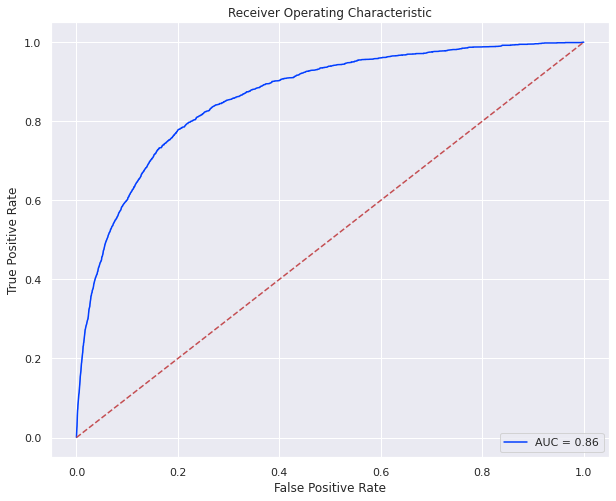

In [102]:
fpr,tpr,_ = roc_curve(y_test, y_pred_RFC)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### <font color='blue'>**Model 2: Using XGBOOST**</font>

##### <font color='green'>**Calling Data Modeling Libraries**</font>

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
xgb = XGBClassifier(n_jobs=-1) 
 
# Use a grid over parameters of interest
param_grid = {
                  'n_estimators' :[100,150,200,250,300],
                  "learning_rate" : [0.001,0.01,0.0001,0.05, 0.10 ],
                  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3 ],
                  "colsample_bytree" : [0.5,0.7],
                  'max_depth': [3,4]
              }

In [ ]:
xgb_randomgrid = RandomizedSearchCV(xgb, param_distributions=param_grid, cv=5)

In [ ]:
xgb_randomgrid.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [ ]:
best_est_XGB = xgb_randomgrid.best_estimator_

In [ ]:
print('Training Set Classifier Accuracy %: {:.2f}'.format(xgb_randomgrid.score(X_train, y_train) * 100))
print('Test Set Classifier Accuracy %: {:.2f}'.format(xgb_randomgrid.score(X_test, y_test) * 100))

Training Set Classifier Accuracy %: 93.95
Test Set Classifier Accuracy %: 93.61


In [ ]:
y_pred_XGB = best_est_XGB.predict_proba(X_train)
y_pred_XGB = y_pred_XGB[:,1]

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Receiver Operating Characteristic')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

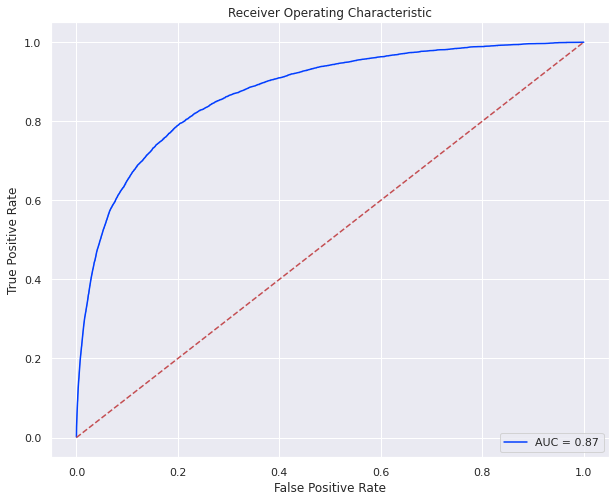

In [ ]:
fpr,tpr,_ = roc_curve(y_train, y_pred_XGB)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####<font color='green'>**Conclusion:**</font>

Between the two models we built, we saw that:</br>
(1) Area Under Curve (AUC) for RandomForest Model is 0.88.</br>
(2) Area Under Curve (AUC) for XGboost Model is 0.87.</br> 
Therefore, it is inferred that RandomForest is the suitable model for this dataset